K-Nearest Neighbors (K-NN) is among the simplest of all machine learning algorithms, simple enough that we're going to code each step ourselves in this lesson. K-NN is a supervised classification algorithm that classifies a data point based on a combination of the known classification of the k points that are closest to it. K-Nearest Neighbors does not attempt to fit a model to the data. Rather, the algorithm simply determines the "majority vote" (the class mode) of the k points that are nearest the point you are trying to classify.

*   Determine k.
*   Calculate the distance between the new observation and all points in the training set.
*   Sort the distances to determine the k nearest neighbors based on the k-th minimum distance.
*   Determine the class of those neighbors.
*   Determine the majority.

In [99]:
# from sklearn.datasets import load_iris
# from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

df = iris = pd.read_csv('/home/MZ/Documents/CODE/THINKFUL/projects/kaggle/ARCHIVE/iris_wiki.csv', 
                        header=0, encoding = "ISO-8859-1")

%matplotlib inline

In [100]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I.Â setosa
1,4.9,3.0,1.4,0.2,I.Â setosa
2,4.7,3.2,1.3,0.2,I.Â setosa
3,4.6,3.1,1.5,0.2,I.Â setosa
4,5.0,3.6,1.4,0.2,I.Â setosa


# Create a scatterplot of sepal length by width in the data set. 
* Sepals are a type of leaf around the petals of a flower.

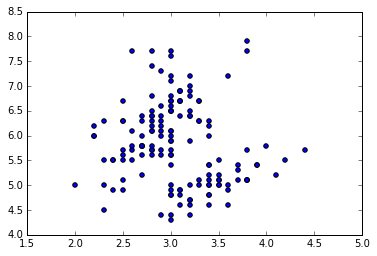

In [101]:
data = pd.DataFrame(df[["Sepal width", "Sepal length"]], columns=['Sepal width','Sepal length'])
plt.scatter(data['Sepal width'], data['Sepal length'])

# Pick a new point, programmatically at random.

In [102]:
from random import choice
x = choice(df["Sepal length"])
y = choice(df["Sepal width"]) 

# Sort each point by its distance from the new point, and subset the 10 nearest points.

In [133]:
from collections import Counter
distances = [((pair[0] - y)**2 + (pair[1] - x)**2)**(-1/2) for pair in zip(df["Sepal width"], df["Sepal length"])]
df["distances"] = distances

# Determine the majority class of the subset.

In [134]:
majority = list(Counter([pair[1] for pair in sorted(zip(df.distances, df.Species), key=lambda x: x[0])[:10]]))[0]
majority

'I.Â\xa0setosa'

# See if you can write a function called knn() that will take k as an argument and return the majority class for different values of k.

In [135]:
def knn(k=10):
    majority = list(Counter([pair[1] for pair in sorted(zip(df.distances, df.Species), key=lambda x: x[0])[:k]]))[0]
    return majority    

# Can you identify any other potential pitfalls with using raw values and the notion of Euclidean distance? Can you imagine a scenario in which these would be misleading?

We've been asked to run knn on only two vectors when three are available. If may be that the vectors chosen are not-informative, or less informative than those not used. 